In [28]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [33]:
import os

os.environ[
    "CUDA_VISIBLE_DEVICES"
] = "-1"  # this line tells TensorFlow not to use any GPU
# Basics
# Basics
import tensorflow as tf
import xarray as xr
import random
import pandas as pd

# Helpful
import tqdm

# Visualization
import matplotlib.pyplot as plt

# Path setup
import sys

sys.path.append("/home/dchen/BA_CH_EN/")


# My Methods
from src.utils.CRPS import *  # CRPS metrics
from src.utils.data_split import *  # Splitting data into X and y
from src.utils.drn_make_X_array import *  # Import make train array functions (make_X_array)
from src.models.EMOS import *  # EMOS implementation
from src.models.EMOS_global.EMOS_global_load_score import *  # Load EMOS_global_scores
from src.models.EMOS_global.EMOS_global_load_model import *  # Load EMOS_global_models
from src.models.EMOS_local.EMOS_local_load_score import *  # Load EMOS_local_scores
from src.models.EMOS_local.EMOS_local_load_model import *  # Load EMOS_local_models
from src.models.DRN.DRN_model import *  # DRN implementation
from src.models.DRN.DRN_load_score import *  # Load DRN_scores
from src.models.DRN.DRN_load_score_10 import *  # Load DRN_scores_10
from src.models.DRN.DRN_load_score_dummy_10 import *  # Load DRN_scores_10
import data.raw.load_data_raw as ldr  # Load raw data
import data.processed.load_data_processed as ldp  # Load processed data normed
import data.processed.load_data_processed_denormed as ldpd  # Load processed data denormed
from src.models.CRPS_baseline.CRPS_load import *  # Load CRPS scores
from src.models.U_net.u_net_load_score import *
from src.models.U_net.u_net_load_preds import *

<IPython.core.display.Javascript object>

### 1. Load All 5 Predictions

In [13]:
u_net_preds_0 = u_net_load_preds("t2m")
u_net_preds_1 = u_net_load_preds_num("t2m", 1)
u_net_preds_2 = u_net_load_preds_num("t2m", 2)
u_net_preds_3 = u_net_load_preds_num("t2m", 3)
u_net_preds_4 = u_net_load_preds_num("t2m", 4)
u_net_preds_all = [
    u_net_preds_0,
    u_net_preds_1,
    u_net_preds_2,
    u_net_preds_3,
    u_net_preds_4,
]

<IPython.core.display.Javascript object>

### 2. Making mean

In [16]:
u_net_preds_mean = []
for lead in range(31):
    sum_help = np.zeros(u_net_preds_0[lead].shape)
    for preds in u_net_preds_all:
        sum_help = sum_help + np.abs(preds[lead])
    u_net_preds_mean.append(sum_help / 5)

<IPython.core.display.Javascript object>

In [18]:
for lead in range(31):
    np.save(
        f"/Data/Delong_BA_Data/preds/U_net_5_mean/U_net_mean_var_2_lead_{lead}_preds.npy",
        u_net_preds_mean[lead],
    )

<IPython.core.display.Javascript object>

### 3. Exploration 

In [44]:
def plot_losses(csv_filepath, starting_epoch=0, ending_epoch=1000000000):
    # Load the csv file into a pandas DataFrame
    data = pd.read_csv(csv_filepath).iloc[starting_epoch:ending_epoch]

    # Create a new figure
    plt.figure(figsize=(10, 5))

    # Plot the training loss
    plt.plot(data["epoch"], data["loss"], label="Train Loss")

    # Plot the validation loss
    plt.plot(data["epoch"], data["val_loss"], label="Validation Loss")

    # Set the labels for the x and y axes
    plt.xlabel("Epochs")
    plt.ylabel("Loss")

    # Set the title for the plot
    plt.title("Training and Validation Loss")

    # Enable the legend
    plt.legend()

    # Display the plot
    plt.show()
    return data


def plot_specific_lead_time_all(lead_time, starting_epoch=225, ending_epoch=1000000000):
    datas = []
    for i in range(1, 5):
        path = f"/Data/Delong_BA_Data/models/U_net/csv_log_final/training{i}_log_var_2_lead_{lead_time}.csv"
        datas.append(
            plot_losses(path, starting_epoch=starting_epoch, ending_epoch=ending_epoch)
        )

<IPython.core.display.Javascript object>

In [45]:
# U-net scores:
u_net_scores_t2m_mean = u_net_load_score_mean("t2m")
u_net_scores_t2m = u_net_load_score("t2m")
u_net_scores_ws10 = u_net_load_score("ws10")

<IPython.core.display.Javascript object>

In [46]:
for i in range(31):
    print(
        f"Lead time: {i}, one score: {u_net_scores_t2m[i].mean()}, mean scores: {u_net_scores_t2m_mean[i].mean()} "
    )

Lead time: 0, one score: 0.42495161003237986, mean scores: 0.4303630266226008 
Lead time: 1, one score: 0.5161724388914475, mean scores: 0.9062361206826867 
Lead time: 2, one score: 0.48082045618246017, mean scores: 0.4835796613070483 
Lead time: 3, one score: 0.5009311629360284, mean scores: 0.524116575582789 
Lead time: 4, one score: 0.5142899399749655, mean scores: 0.5350468583314253 
Lead time: 5, one score: 0.5661681865393049, mean scores: 0.6236752655841622 
Lead time: 6, one score: 0.5751077347474289, mean scores: 0.5910464863300344 
Lead time: 7, one score: 0.5847748971522383, mean scores: 0.6014637855144163 
Lead time: 8, one score: 0.600465965810075, mean scores: 0.6094976270828353 
Lead time: 9, one score: 0.6738120446921264, mean scores: 0.672549851674383 
Lead time: 10, one score: 0.6793977633554567, mean scores: 0.6716841884325426 
Lead time: 11, one score: 0.6955918473290316, mean scores: 0.7209302371450579 
Lead time: 12, one score: 0.7319965175067631, mean scores: 0.71

<IPython.core.display.Javascript object>

Outliers lead times: 1, 13,17, 22, 25

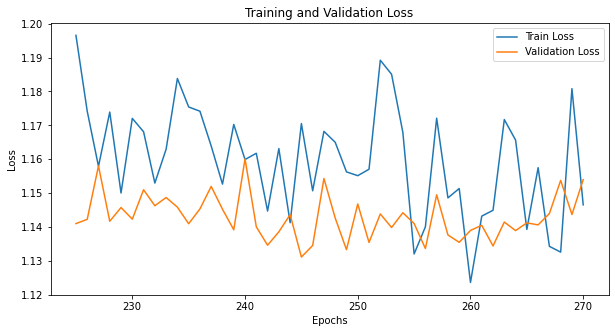

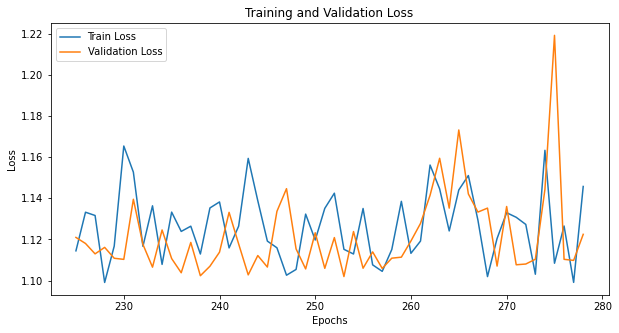

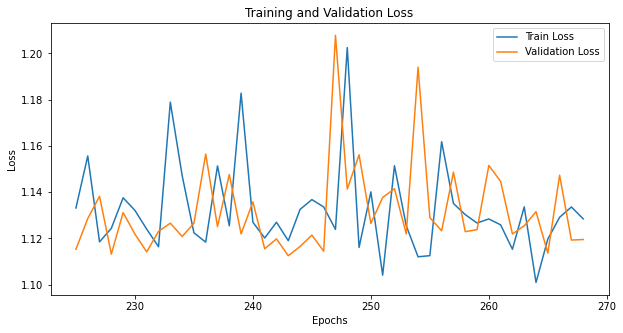

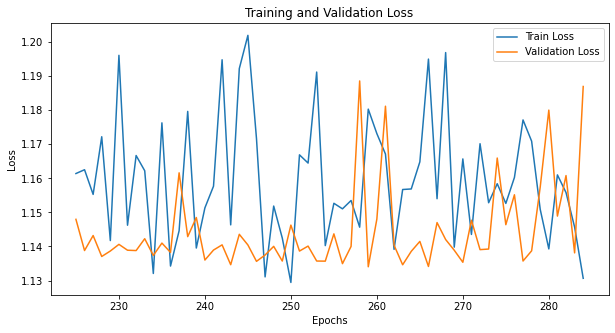

<IPython.core.display.Javascript object>

In [48]:
datas = plot_specific_lead_time_all(25)